In [1]:
import numpy as np
import pandas as pd

# KLASIFIKACIJA

Za svaku supstancu postoji vise klasa koje mogu da se klasifikuju, stoga radice se klasifikacija svake supstance posebno

### UCITAVANJE I PREPROCESIRANJE PODATAKA
*deo koda uzet iz fajla za analizu podataka*

In [3]:
sirovi_podaci = pd.read_csv('drug_consumption.data')
sirovi_podaci #fale imena atributa

#procitano sa sajtu podataka 
kolone = ["ID", "Age", "Gender", "Education", "Country", "Ethnicity", 
            "Nscore", "Escore", "Oscore", "Ascore", "Cscore", "Impulsiveness", "SS", 
            "Alchocol", "Amphet", "Amyl", "Benzos", "Caff", "Canabis", "Choc", "Coke", "Crack", "Ecstasy", 
            "Heroin", "Ketamin", "LegalH", "LSD", "Meth", "Mushrooms", "Nicotine", "Semer", "VSA"]

sirovi_podaci = pd.read_csv('drug_consumption.data', names = kolone)

podaci = sirovi_podaci.copy()

#ID mi ne igra nikakvu ulogu svakako
podaci = podaci.drop('ID', axis = 1)


In [7]:
podaci
print(f'Broj istanci: {podaci.shape[0]}')
print(f'Broj atributa: {podaci.shape[1]}')
podaci.describe()

Broj istanci: 1885
Broj atributa: 31


,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsiveness,SS
count,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [11]:
podaci.isna().any().any() #nema nedostajucih vrednosti, sto je dobro

False

In [15]:
# posto imamo vise klasa koje ispitujemo, razdvajam podatke na atribute i na klase
podaci.head()

#izdvajanje atributa
atributi1 = podaci.columns
atributi1

atributi = []
for atribut in atributi1:
    if atribut == 'Alchocol':
        break
    atributi.append(atribut)
    
print(atributi, end = ', ')

['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsiveness', 'SS'], 

In [19]:
#izdvajanje klasa
klase = []
for atribut in atributi1:
    if atribut not in atributi:
        klase.append(atribut)
        
print(klase, end = ', ')
print()

# provera deljenja kolona
print(len(klase) + len(atributi) == len(podaci.columns))

['Alchocol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Canabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamin', 'LegalH', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA'], 
True


In [21]:
#skaliramo podatke
def skaliraj_podatke(X):
    return (X - min(X))/(max(X) - min(X))

In [24]:
skalirani_podaci = podaci.copy()
for a in atributi:
    skalirani_podaci[a] = skaliraj_podatke(skalirani_podaci[a])
    
#provera uspesnosti skaliranja
for a in atributi:
    print(len(skalirani_podaci[a].unique()) == len(podaci[a].unique()), end = ", ")
    
#nismo izgubili podatke

True, True, True, True, True, True, True, True, True, True, True, True, 

# KLASIFIKACIJA 

In [32]:
#provera klasifikacije nad jednom klasom (za sad)
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [28]:
podaci_bez_klasa = podaci.copy()
for x in klase:
    podaci_bez_klasa = podaci_bez_klasa.drop(x, axis = 1)
podaci_bez_klasa.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsiveness,SS
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575


In [45]:
klasa = podaci[klase[0]]
print(podaci_bez_klasa.shape)
print(klasa.shape)

(1885, 12)
(1885,)


In [46]:
# potencijalno treba izvrsiti balansiranje podataka, zasad pokusavam bez
X_train, X_test, y_train, y_test = train_test_split(podaci_bez_klasa, klasa, test_size= 0.30, stratify= klasa, random_state= 42)

In [47]:
print(X_train.shape, X_test.shape)

(1319, 12) (566, 12)


In [48]:
# nakon particionisanja podataka kreiramo model
drvo_klasifikacije = DecisionTreeClassifier()
drvo_klasifikacije.fit(X_train, y_train)

DecisionTreeClassifier()

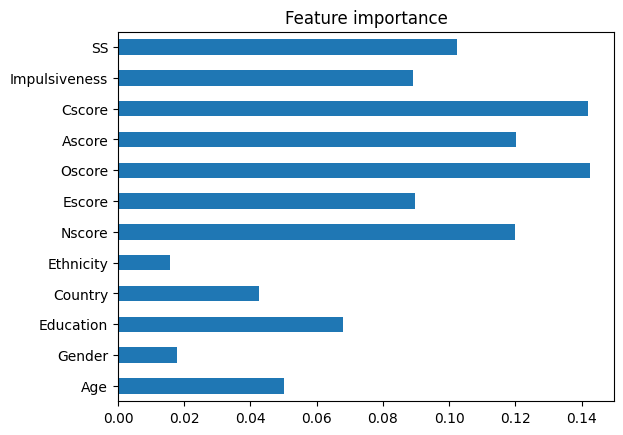

In [70]:
pd.Series(drvo_klasifikacije.feature_importances_, index=podaci_bez_klasa.columns).plot.barh()
plt.title("Feature importance")
plt.show()

In [71]:
report(drvo_klasifikacije, X_train, y_train)
# deluje da s preprilagodio
print(balansirano_drvo.best_score_)


Klasifikacioni izveštaj za model DecisionTreeClassifier nad trening podacima
------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       1.00      1.00      1.00        24
         CL1       1.00      1.00      1.00        24
         CL2       1.00      1.00      1.00        48
         CL3       1.00      1.00      1.00       138
         CL4       1.00      1.00      1.00       201
         CL5       1.00      1.00      1.00       531
         CL6       1.00      1.00      1.00       353

    accuracy                           1.00      1319
   macro avg       1.00      1.00      1.00      1319
weighted avg       1.00      1.00      1.00      1319

0.31084514344970615


In [73]:
report(drvo_klasifikacije, X_test, y_test, text= 'test')
# radi uzasno

Klasifikacioni izveštaj za model DecisionTreeClassifier nad test podacima
------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       0.00      0.00      0.00        10
         CL1       0.00      0.00      0.00        10
         CL2       0.04      0.05      0.05        20
         CL3       0.11      0.12      0.11        60
         CL4       0.13      0.14      0.13        86
         CL5       0.46      0.43      0.45       228
         CL6       0.31      0.32      0.31       152

    accuracy                           0.30       566
   macro avg       0.15      0.15      0.15       566
weighted avg       0.30      0.30      0.30       566



In [74]:
# menjamo parametre
parametri =  {
    'criterion': ['gini', 'entropy'],
    'max_depth': [x for x in range(3, 30)],
    'max_features': [x for x in range(3, 40)]
}

balansirano_drvo = GridSearchCV(DecisionTreeClassifier(class_weight= 'balanced'), param_grid= parametri)
nebalansirano_drvo = GridSearchCV(DecisionTreeClassifier(), param_grid= parametri)

In [75]:
#pokusavamo sa balansiranim drvetom
balansirano_drvo.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29],
                         'max_features': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                          14, 15, 16, 17, 18, 19, 20, 21, 22,
                                          23, 24, 25, 26, 27, 28, 29, 30, 31,
                                          32, ...]})

In [77]:
print(balansirano_drvo.best_params_)
print(balansirano_drvo.best_score_)

{'criterion': 'gini', 'max_depth': 21, 'max_features': 5}
0.3146301417213965


In [ ]:
report(balansirano_drvo.best_estimator_, X_test, y_test, 'test')

In [78]:
#pokusavam bez balansiranog drveta
nebalansirano_drvo.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29],
                         'max_features': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                          14, 15, 16, 17, 18, 19, 20, 21, 22,
                                          23, 24, 25, 26, 27, 28, 29, 30, 31,
                                          32, ...]})

In [79]:
print(balansirano_drvo.best_params_)
print(balansirano_drvo.best_score_)

{'criterion': 'gini', 'max_depth': 21, 'max_features': 5}
0.3146301417213965
